In [6]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [3]:
board_width = 9
board_height = 7

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((board_width*board_height,3), np.float32)
objp[:,:2] = np.mgrid[0:board_width, 0:board_height].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calib_imgs/image-*.jpeg')
print('found {} images'.format(len(images)))

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (board_width,board_height), None)
    print("{} - found {} corners".format(fname, len(corners) if ret == True else 0))
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (board_width,board_height), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

found 30 images
calib_imgs/image-30.jpeg - found 63 corners
calib_imgs/image-31.jpeg - found 63 corners
calib_imgs/image-12.jpeg - found 63 corners
calib_imgs/image-1.jpeg - found 63 corners
calib_imgs/image-3.jpeg - found 63 corners
calib_imgs/image-6.jpeg - found 63 corners
calib_imgs/image-11.jpeg - found 63 corners
calib_imgs/image-2.jpeg - found 63 corners
calib_imgs/image-21.jpeg - found 63 corners
calib_imgs/image-25.jpeg - found 63 corners
calib_imgs/image-5.jpeg - found 63 corners
calib_imgs/image-7.jpeg - found 63 corners
calib_imgs/image-33.jpeg - found 63 corners
calib_imgs/image-18.jpeg - found 63 corners
calib_imgs/image-9.jpeg - found 63 corners
calib_imgs/image-23.jpeg - found 63 corners
calib_imgs/image-16.jpeg - found 63 corners
calib_imgs/image-19.jpeg - found 63 corners
calib_imgs/image-20.jpeg - found 63 corners
calib_imgs/image-17.jpeg - found 63 corners
calib_imgs/image-28.jpeg - found 63 corners
calib_imgs/image-14.jpeg - found 63 corners
calib_imgs/image-29.jpe

In [7]:
import pickle
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_calibration_pickle.p", "wb" ) )

Text(0.5, 1.0, 'Undistorted Image')

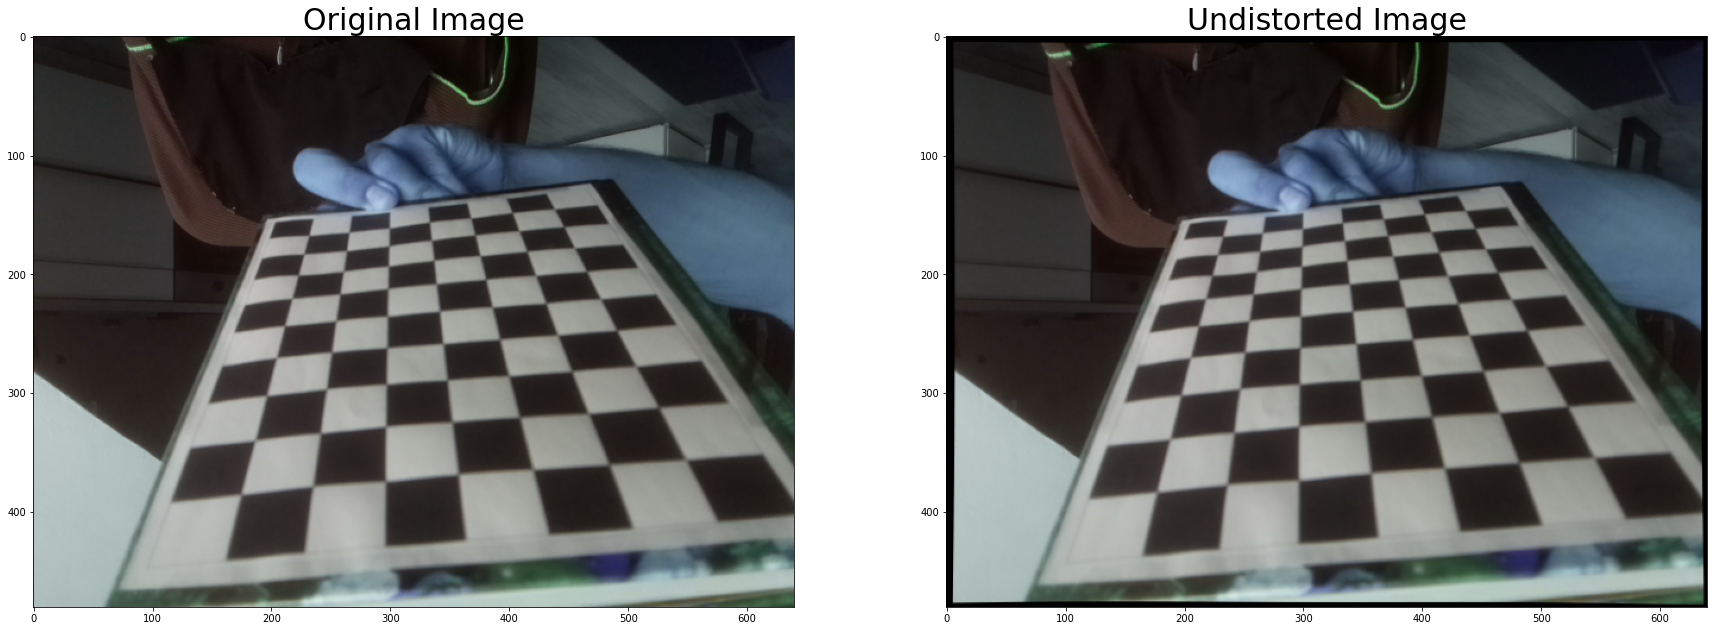

In [14]:
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calib_imgs/image-23.jpeg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points



dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)

#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,15))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

Text(0.5, 1.0, 'Undistorted Image')

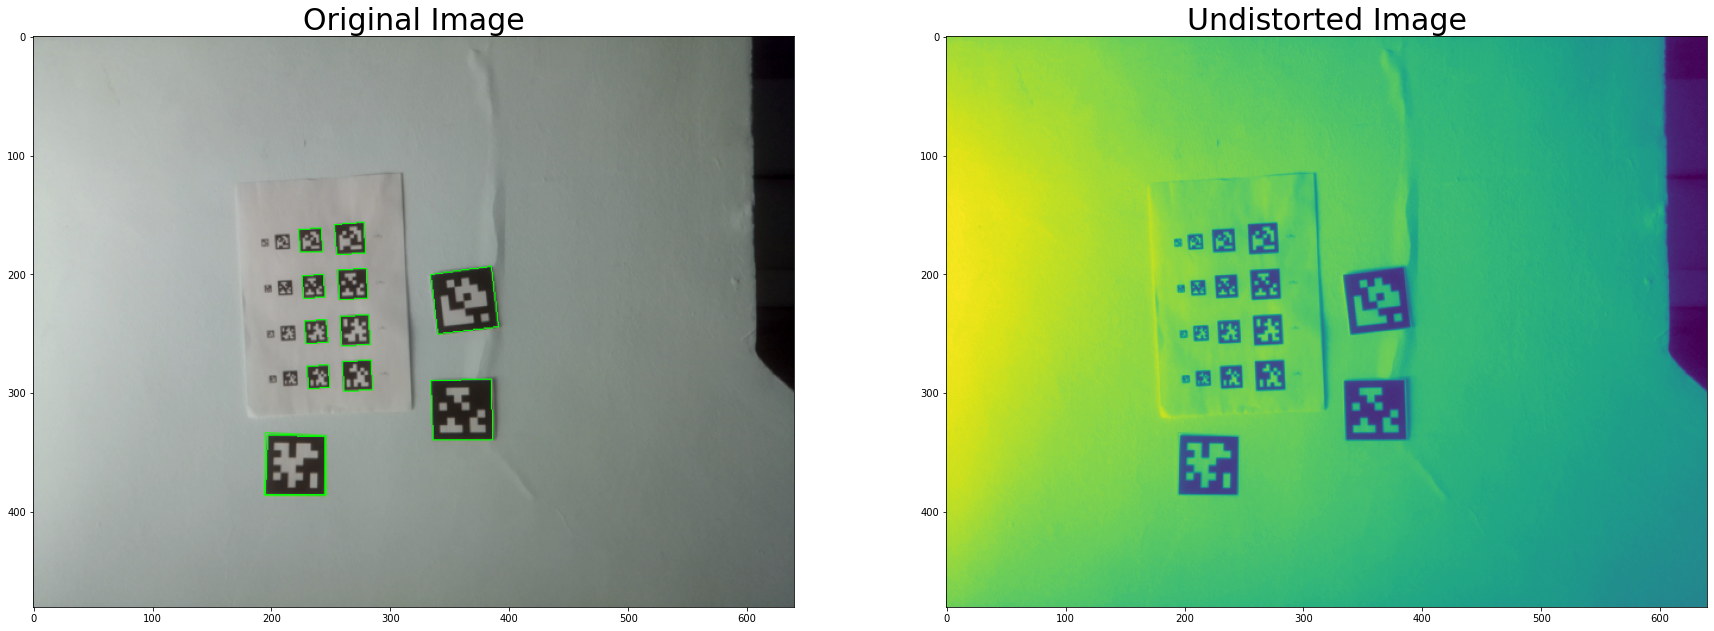

In [46]:
from dt_apriltags import Detector

detector = Detector(searchpath=['/usr/local/lib'],
                                families='tag36h11',
                                nthreads=3,
                                quad_decimate=1.0,
                                quad_sigma=0.8,
                                refine_edges=1,
                                decode_sharpening=0.25,
                                debug=0)
img = cv2.imread('calib_imgs/640x480_april/download.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
K = (329.8729619143081, 332.94611303946357, 528.0, 396.0)
# detections = detector.detect(gray, estimate_tag_pose=True, camera_params=K, tag_size=0.05 )
detections = detector.detect(gray, estimate_tag_pose=False)
for det in detections:
    color = (0, 255, 0) 
    pts = np.array(det.corners, np.int32).reshape((-1, 1, 2))
#     print(pts)
    img = cv2.polylines(img, [pts], True, color)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,15))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(gray)
ax2.set_title('Undistorted Image', fontsize=30)